# Support Vector Machine on Amazon Food Reviews

Dataset Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of the fine food from Amazon.

Timespan: Oct 1999 - Oct 2012
Total Number of Reviews: 568,454
Total Number of Users: 256,059
Total Number of Products: 74,258
Total Number of Profile Name: 218,418

Number of attributes/columns: 10

Attributes/Columns:

1. Id: Row Id
2. ProductId: Unique identifier for the product
3. UserId: Unqiue identifier for the user
4. ProfileName: Profile name of the user
5. HelpfulnessNumerator: Number of users who found the review helpful
6. HelpfulnessDenominator: Number of users who indicated whether they found the review helpful or not
7. Score: Rating between 1 and 5
8. Time: Timestamp for the review
9. Summary: Brief summary of the review
10. Text: Text of the review

**Aim: Applied TFIDF technique to transform texts into vectors and then split the dataset into train and test data in ratio of 80:20. And then apply Support Vector Machine and check the accuracy.**




# Loading the data

The dataset is available in two forms on kaggle:

1. .csv file

2. SQLite Database

To load data, I have used SQLite dataset as it is easier to query and visualise the data.Here I have to classifiy the sentiment into positive and negative, so I will ignore all the reviews with Scores equal to 3.If the Score is greater than 3 then it is positive otherwise it is negative.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
conn=sqlite3.connect('CleanedAmazonFoodReviewDataset.sqlite')

In [3]:
dataset=pd.read_sql_query("SELECT * FROM REVIEWS",conn)

In [4]:
dataset.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,have bought sever the vital can dog food produ...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this confect that has been around few centuri ...
3,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price there was wide assort ...
4,5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,Positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair for taffi and order this five po...


In [5]:
dataset.shape

(364171, 12)

In [6]:
dataset["Score"].value_counts()

Positive    307061
Negative     57110
Name: Score, dtype: int64

In [7]:
def changeScore(score):
    if(score=="Positive"):
        return 1
    else:
        return 0

In [8]:
scores=list(dataset["Score"])

In [9]:
convertedScore=list(map(changeScore,scores))

In [10]:
convertedScore[:10]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [11]:
dataset["Score"]=convertedScore

In [12]:
dataset.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,have bought sever the vital can dog food produ...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this confect that has been around few centuri ...
3,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price there was wide assort ...
4,5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair for taffi and order this five po...


In [13]:
allPositiveReviews=dataset[dataset["Score"]==1]

In [14]:
allPositiveReviews.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,have bought sever the vital can dog food produ...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this confect that has been around few centuri ...
3,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price there was wide assort ...
4,5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair for taffi and order this five po...
5,6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,1,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,this saltwat taffi had great flavor and was ve...


In [15]:
allPositiveReviews.shape

(307061, 12)

In [16]:
positiveReviews10000=allPositiveReviews[:10000]

In [17]:
positiveReviews10000.shape

(10000, 12)

In [18]:
positiveReviews10000.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,have bought sever the vital can dog food produ...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this confect that has been around few centuri ...
3,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price there was wide assort ...
4,5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair for taffi and order this five po...
5,6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,1,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,this saltwat taffi had great flavor and was ve...


In [19]:
allNegativeReviews=dataset[dataset["Score"]==0]

In [20]:
allNegativeReviews.shape

(57110, 12)

In [21]:
allNegativeReviews.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...
11,12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,0,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,cat have been happili eat felida platinum for ...
15,16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,0,1348099200,poor taste,I love eating them and they are good for watch...,love eat them and they are good for watch and ...
25,26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,0,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",the candi just red flavor just plan and chewi ...
45,47,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,0,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",this oatmeal not good it mushi soft dont like ...


In [22]:
negativeReviews10000=allNegativeReviews[:10000]

In [23]:
negativeReviews10000.shape

(10000, 12)

In [24]:
negativeReviews10000.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...
11,12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,0,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,cat have been happili eat felida platinum for ...
15,16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,0,1348099200,poor taste,I love eating them and they are good for watch...,love eat them and they are good for watch and ...
25,26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,0,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",the candi just red flavor just plan and chewi ...
45,47,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,0,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",this oatmeal not good it mushi soft dont like ...


In [25]:
dataframe20000=[positiveReviews10000,negativeReviews10000]

In [26]:
finalDataFrame20000=pd.concat(dataframe20000)

In [27]:
finalDataFrame20000.shape

(20000, 12)

In [28]:
finalDataFrame20000.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,have bought sever the vital can dog food produ...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this confect that has been around few centuri ...
3,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price there was wide assort ...
4,5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair for taffi and order this five po...
5,6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,1,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,this saltwat taffi had great flavor and was ve...


In [29]:
finalSortedDataFrame20000=finalDataFrame20000.sort_values('Time',inplace=False,axis=0,ascending=True)

In [30]:
finalSortedDataFrame20000.shape

(20000, 12)

In [31]:
finalSortedDataFrame20000.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
772,1146,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,1,961718400,Great Product,This was a really good idea and the final prod...,this was realli good idea and the final produc...
771,1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,just receiv shipment and could hard wait tri t...
7852,10992,11991,B0000T15M8,A2928LJN5IISB4,chatchi,5,5,1,1067990400,The fruits of my labor,When chatchi's favorite afternoon treat became...,when chatchi favorit afternoon treat becam mys...
5822,7427,8111,B0000EIE2Z,A3M174IC0VXOS2,Gail Cooke,3,3,1,1075420800,BEST BLUEBERRIES,In the winter when fresh blueberries exceed ou...,the winter when fresh blueberri exceed our foo...
7179,10116,11049,B0000VYKXC,A3L88AH6MABEDL,Javier Denison,0,0,1,1081209600,Best coffee I've tasted. I try others but alwa...,If you like a strong but smooth flavorful coff...,you like strong but smooth flavor coffe this h...


In [32]:
finalSortedDataFrameScore20000=finalSortedDataFrame20000["Score"]

In [33]:
finalSortedDataFrameScore20000.shape

(20000,)

In [34]:
finalSortedDataFrameScore20000.head()

772     1
771     1
7852    1
5822    1
7179    1
Name: Score, dtype: int64

In [35]:
final_data=finalSortedDataFrame20000

In [36]:
final_data.shape

(20000, 12)

In [37]:
final_data_labels=finalSortedDataFrameScore20000

In [38]:
final_data_labels.shape

(20000,)

# TFIDF

In [39]:
positive_reviews=final_data[final_data["Score"]==1]
negative_reviews=final_data[final_data["Score"]==0]

In [40]:
positive_reviews.shape

(10000, 12)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
positive_tfidf_vector=TfidfVectorizer(ngram_range=(1,2),stop_words='english')
positive_tfidf=positive_tfidf_vector.fit_transform(positive_reviews['ProcessedText'].values)

In [43]:
positive_tfidf.shape

(10000, 210543)

In [44]:
features=positive_tfidf_vector.get_feature_names()

In [45]:
idfValues=positive_tfidf_vector.idf_

In [46]:
d=dict(zip(features,9-idfValues))

In [47]:
sortedDict=sorted(d.items(),key=lambda d:d[1],reverse=True)

In [48]:
for i in range(100):
    print(sortedDict[i])

('like', 6.83866735434989)
('tast', 6.805217247580823)
('good', 6.76443653358236)
('great', 6.7336971241375965)
('love', 6.693155922637786)
('flavor', 6.578600034680961)
('just', 6.525866729571769)
('use', 6.520612777030611)
('tri', 6.518415456876027)
('veri', 6.501556140071153)
('product', 6.428239456899597)
('make', 6.357938900860006)
('buy', 6.125845293044781)
('realli', 6.0934028583011886)
('onli', 6.058479761217205)
('time', 6.054989356277437)
('best', 6.0106647312059795)
('price', 5.961984210148329)
('dont', 5.930012676124642)
('eat', 5.922855587919552)
('coffe', 5.915646906322609)
('littl', 5.888761376576577)
('order', 5.85175126531004)
('amazon', 5.841415255979378)
('store', 5.82658724770976)
('becaus', 5.8088562867385285)
('recommend', 5.79080525509296)
('better', 5.7880692752740845)
('food', 5.742288277648353)
('ive', 5.709243482870894)
('ani', 5.666855704520913)
('mix', 5.654407410994345)
('high', 5.615019669278791)
('drink', 5.607390204477634)
('want', 5.589729701325684)
('

In [49]:
from wordcloud import WordCloud

In [50]:
def PlotWordCloud(frequency):
    wordCloudPlot=WordCloud(background_color="white",width=150,height=80)
    wordCloudPlot.generate_from_frequencies(frequencies=frequency)
    plt.figure(figsize=(15,10))
    plt.imshow(wordCloudPlot,interpolation="bilinear")
    plt.axis("off")
    plt.show()

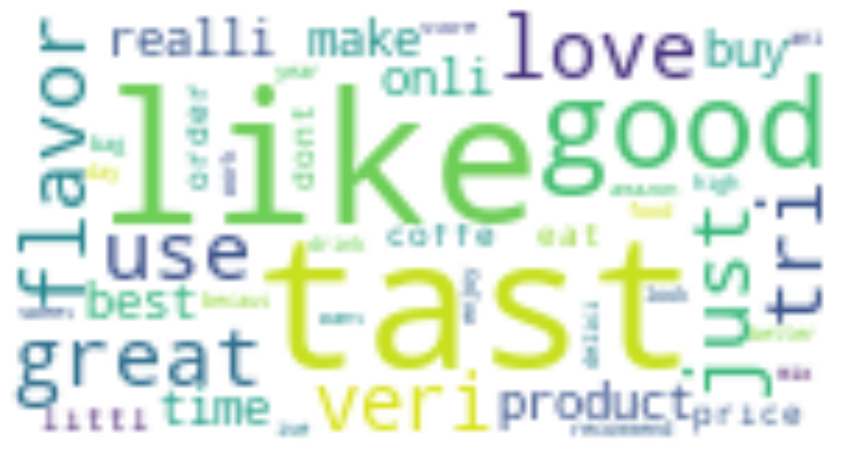

In [51]:
PlotWordCloud(d)

In [52]:
negative_tfidf_vector=TfidfVectorizer(ngram_range=(1,2),stop_words='english')
negative_tfidf=negative_tfidf_vector.fit_transform(negative_reviews['ProcessedText'].values)

In [53]:
negative_tfidf.shape

(10000, 243086)

In [54]:
features=positive_tfidf_vector.get_feature_names()

In [55]:
idfValues=positive_tfidf_vector.idf_

In [56]:
d=dict(zip(features,9-idfValues))

In [57]:
sortedDict=sorted(d.items(),key=lambda d:d[1],reverse=True)

In [58]:
for i in range(100):
    print(sortedDict[i])

('like', 6.83866735434989)
('tast', 6.805217247580823)
('good', 6.76443653358236)
('great', 6.7336971241375965)
('love', 6.693155922637786)
('flavor', 6.578600034680961)
('just', 6.525866729571769)
('use', 6.520612777030611)
('tri', 6.518415456876027)
('veri', 6.501556140071153)
('product', 6.428239456899597)
('make', 6.357938900860006)
('buy', 6.125845293044781)
('realli', 6.0934028583011886)
('onli', 6.058479761217205)
('time', 6.054989356277437)
('best', 6.0106647312059795)
('price', 5.961984210148329)
('dont', 5.930012676124642)
('eat', 5.922855587919552)
('coffe', 5.915646906322609)
('littl', 5.888761376576577)
('order', 5.85175126531004)
('amazon', 5.841415255979378)
('store', 5.82658724770976)
('becaus', 5.8088562867385285)
('recommend', 5.79080525509296)
('better', 5.7880692752740845)
('food', 5.742288277648353)
('ive', 5.709243482870894)
('ani', 5.666855704520913)
('mix', 5.654407410994345)
('high', 5.615019669278791)
('drink', 5.607390204477634)
('want', 5.589729701325684)
('

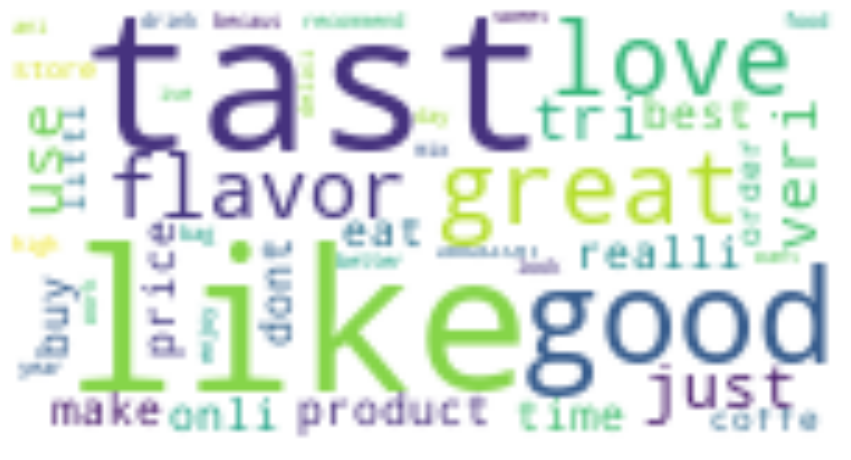

In [59]:
PlotWordCloud(d)

In [60]:
positiveReviews10000=allPositiveReviews[0:10000]

In [61]:
positiveReviews10000.shape

(10000, 12)

In [62]:
positiveReviews10000.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,have bought sever the vital can dog food produ...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this confect that has been around few centuri ...
3,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price there was wide assort ...
4,5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair for taffi and order this five po...
5,6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,1,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,this saltwat taffi had great flavor and was ve...


In [63]:
negativeReviews10000=allNegativeReviews[0:10000]

In [64]:
negativeReviews10000.shape

(10000, 12)

In [65]:
negativeReviews10000.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...
11,12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,0,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,cat have been happili eat felida platinum for ...
15,16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,0,1348099200,poor taste,I love eating them and they are good for watch...,love eat them and they are good for watch and ...
25,26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,0,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",the candi just red flavor just plan and chewi ...
45,47,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,0,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",this oatmeal not good it mushi soft dont like ...


In [66]:
dataFrame20000=[positiveReviews10000,negativeReviews10000]

In [67]:
finalDataFrame20000=pd.concat(dataFrame20000)

In [68]:
finalDataFrame20000.shape

(20000, 12)

In [69]:
finalDataFrame20000.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,have bought sever the vital can dog food produ...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this confect that has been around few centuri ...
3,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price there was wide assort ...
4,5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair for taffi and order this five po...
5,6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,1,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,this saltwat taffi had great flavor and was ve...


In [70]:
finalSortedDataFrame20000=finalDataFrame20000.sort_values('Time',axis=0,ascending=True,inplace=False)

In [71]:
finalSortedDataFrame20000.shape

(20000, 12)

In [72]:
finalSortedDataFrame20000.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
772,1146,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,1,961718400,Great Product,This was a really good idea and the final prod...,this was realli good idea and the final produc...
771,1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,just receiv shipment and could hard wait tri t...
7852,10992,11991,B0000T15M8,A2928LJN5IISB4,chatchi,5,5,1,1067990400,The fruits of my labor,When chatchi's favorite afternoon treat became...,when chatchi favorit afternoon treat becam mys...
5822,7427,8111,B0000EIE2Z,A3M174IC0VXOS2,Gail Cooke,3,3,1,1075420800,BEST BLUEBERRIES,In the winter when fresh blueberries exceed ou...,the winter when fresh blueberri exceed our foo...
7179,10116,11049,B0000VYKXC,A3L88AH6MABEDL,Javier Denison,0,0,1,1081209600,Best coffee I've tasted. I try others but alwa...,If you like a strong but smooth flavorful coff...,you like strong but smooth flavor coffe this h...


In [73]:
finalSortedDataFrameScore20000=finalSortedDataFrame20000['Score']

In [74]:
finalSortedDataFrameScore20000.shape

(20000,)

In [75]:
finalSortedDataFrameScore20000.head()

772     1
771     1
7852    1
5822    1
7179    1
Name: Score, dtype: int64

In [76]:
final_data=finalSortedDataFrame20000

In [77]:
final_data.shape

(20000, 12)

In [78]:
final_data_labels=finalSortedDataFrameScore20000

In [79]:
final_data_labels.shape

(20000,)

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
tfidf_vector=TfidfVectorizer(ngram_range=(1,2))

In [82]:
final_data_tfidf=tfidf_vector.fit_transform(final_data['ProcessedText'].values)

In [83]:
final_data_tfidf.shape

(20000, 399315)

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
sc=StandardScaler(with_mean=False)
final_data_tfidf_sc=sc.fit_transform(final_data_tfidf)

**Split the dataset into train and test data in the ratio of 80:20.**

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test=train_test_split(final_data_tfidf_sc,final_data_labels,test_size=0.20,)

In [88]:
X_train.shape

(16000, 399315)

In [89]:
X_test.shape

(4000, 399315)

**Apply Support Vector Machine and check the accuracy**

In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [91]:
svc=SVC()

In [92]:
svc.fit(X_train,y_train)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [93]:
y_pred=svc.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [95]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6445

In [96]:
recall=recall_score(y_test, y_pred)
recall

0.7471204188481675

In [97]:
precision=precision_score(y_test, y_pred)
precision

0.6031276415891801

In [98]:
f1score=f1_score(y_test, y_pred)
f1score

0.667446211412535

In [99]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[1151,  939],
       [ 483, 1427]], dtype=int64)

**Accuracy: 64.45%**